## a) Import the useful Python libraries.

In [9]:
import pandas as pd
import geopandas as gpd
import dateutil
from shapely.geometry import shape,Point,Polygon,mapping

## b) Import the shapefile of strategic noise map of the agglomeration of Barcelonès I.

In [10]:
fp1 = "mesBCNI_SHP/mesBCN1.shp"

## c) Read the shapefile as Geodataframe ("Noise").

In [11]:
Noise = gpd.read_file(fp1)

## d) Check the table of the Geodataframe.

In [60]:
Noise.head()

,IDTRAM,TVLDIA,TVLVES,TVLNIT,TVLDEN,TFLDIA,TFLVES,TFLNIT,TFLDEN,TALDIA,...,TOTDIA,TOTVES,TOTNIT,TOTDEN,POBTOT,POBINT,POBEXT,IDAGLO,CODI_INE,geometry
0,1,69,69,64,72,0,0,0,0,0,...,69,69,64,72,419,0,419,BCN1,08019,"LINESTRING (431811.319 4586053.808, 431815.939..."
1,2,63,63,56,65,0,0,0,0,0,...,63,63,56,65,225,0,225,BCN1,08019,"LINESTRING (431945.629 4586034.777, 431909.599..."
2,3,63,63,56,65,0,0,0,0,0,...,63,63,56,65,76,0,76,BCN1,08019,"LINESTRING (431856.848 4585949.038, 431921.499..."
3,4,58,58,51,60,0,0,0,0,0,...,58,58,51,60,161,0,161,BCN1,08019,"LINESTRING (431649.598 4585971.319, 431664.329..."
4,5,67,67,62,70,0,0,0,0,0,...,67,67,62,70,243,0,243,BCN1,08019,"LINESTRING (431437.549 4586107.351, 431451.810..."


## e) Check the number of rows of the dataset "Noise".

In [48]:
Noise['IDTRAM'].count()

16742

## f) Check the data type.

In [14]:
type(Noise)

geopandas.geodataframe.GeoDataFrame

## g) Check the Coordinate Reference system (CRS).

In [15]:
Noise.crs

<Projected CRS: EPSG:25831>
Name: ETRS89 / UTM zone 31N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe - 0°E to 6°E and ETRS89 by country
- bounds: (0.0, 37.0, 6.01, 82.41)
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

## h) Check the geometry field format.

In [46]:
Noise['geometry'].dtype

## i) Describing the data variables of the dataset "Noise"

In [57]:
Noise.describe()

count    16742.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: OCLDIA, dtype: float64

In [50]:
Noise["TVLDIA"].mean()

58.84541870744236

## j) Calculate the number of non-null unique INLDIA entries.

In [54]:
Noise["INLDIA"].nunique()

22

## k) Calculate the number of non-null unique TVLVES entries and describe the variable.

In [34]:
Noise["TVLVES"].nunique()

58

In [56]:
Noise["TVLVES"].describe()

count    16742.000000
mean        57.440748
std         16.409335
min          0.000000
25%         57.000000
50%         62.000000
75%         66.000000
max         77.000000
Name: TVLVES, dtype: float64

## l) Check the presence of Null values in the dataset "Noise".

In [27]:
Noise.isnull().any()

IDTRAM      False
TVLDIA      False
TVLVES      False
TVLNIT      False
TVLDEN      False
TFLDIA      False
TFLVES      False
TFLNIT      False
TFLDEN      False
TALDIA      False
TALVES      False
TALNIT      False
TALDEN      False
INLDIA      False
INLVES      False
INLNIT      False
INLDEN      False
OCLDIA      False
OCLVES      False
OCLNIT      False
OCLDEN      False
TOTDIA      False
TOTVES      False
TOTNIT      False
TOTDEN      False
POBTOT      False
POBINT      False
POBEXT      False
IDAGLO      False
CODI_INE    False
geometry    False
dtype: bool

## m) Count the number of Null values in the dataset "Noise".

In [28]:
count_nan = len(Noise) - Noise.count()
count_nan

IDTRAM      0
TVLDIA      0
TVLVES      0
TVLNIT      0
TVLDEN      0
TFLDIA      0
TFLVES      0
TFLNIT      0
TFLDEN      0
TALDIA      0
TALVES      0
TALNIT      0
TALDEN      0
INLDIA      0
INLVES      0
INLNIT      0
INLDEN      0
OCLDIA      0
OCLVES      0
OCLNIT      0
OCLDEN      0
TOTDIA      0
TOTVES      0
TOTNIT      0
TOTDEN      0
POBTOT      0
POBINT      0
POBEXT      0
IDAGLO      0
CODI_INE    0
geometry    0
dtype: int64

## n) Drop the Null Values in the columns 'IDTRAM' and 'TVLVES' and build a new geodataframe called "Noise2".

In [29]:
Noise2=Noise.dropna(subset=['IDTRAM','TVLVES'])

## o) Check the number of rows of the dataset "Noise2".

In [30]:
Noise2['IDAGLO'].count()

16742

## p) Number of non-null unique IDTRAM entries of the dataset "Noise2".

In [35]:
Noise2['IDTRAM'].nunique()

16742

In [36]:
Noise2['IDAGLO'].nunique()

1

In [37]:
Noise2.describe()

,TVLDIA,TVLVES,TVLNIT,TVLDEN,TFLDIA,TFLVES,TFLNIT,TFLDEN,TALDIA,TALVES,...,OCLVES,OCLNIT,OCLDEN,TOTDIA,TOTVES,TOTNIT,TOTDEN,POBTOT,POBINT,POBEXT
count,16742.000000,16742.000000,16742.000000,16742.000000,16742.000000,16742.000000,16742.000000,16742.000000,16742.0,16742.0,...,16742.000000,16742.000000,16742.000000,16742.000000,16742.000000,16742.000000,16742.000000,16742.000000,16742.000000,16742.000000
mean,58.845419,57.440748,51.615697,60.265022,2.384303,2.313642,2.075081,2.484649,0.0,0.0,...,0.653267,2.375463,2.643472,62.118863,60.575977,54.569824,63.717955,98.187373,11.534882,86.652491
std,16.799869,16.409335,15.294187,17.178666,10.681613,10.357224,9.321741,11.113437,0.0,0.0,...,6.182074,11.508320,12.672604,7.518329,7.465553,8.027668,7.639956,133.267770,53.307138,130.068519
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58.000000,57.000000,50.000000,59.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,58.000000,57.000000,50.000000,60.000000,7.000000,0.000000,0.000000
50%,63.000000,62.000000,55.000000,64.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,63.000000,62.000000,56.000000,65.000000,53.000000,0.000000,38.000000
75%,67.000000,66.000000,60.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,67.000000,66.000000,60.000000,69.000000,137.750000,0.000000,119.000000
max,79.000000,77.000000,73.000000,81.000000,67.000000,64.000000,58.000000,67.000000,0.0,0.0,...,66.000000,68.000000,74.000000,79.000000,77.000000,73.000000,81.000000,2776.000000,1773.000000,2776.000000


In [38]:
Noise2.isnull().any()

IDTRAM      False
TVLDIA      False
TVLVES      False
TVLNIT      False
TVLDEN      False
TFLDIA      False
TFLVES      False
TFLNIT      False
TFLDEN      False
TALDIA      False
TALVES      False
TALNIT      False
TALDEN      False
INLDIA      False
INLVES      False
INLNIT      False
INLDEN      False
OCLDIA      False
OCLVES      False
OCLNIT      False
OCLDEN      False
TOTDIA      False
TOTVES      False
TOTNIT      False
TOTDEN      False
POBTOT      False
POBINT      False
POBEXT      False
IDAGLO      False
CODI_INE    False
geometry    False
dtype: bool

In [39]:
count_nan2 = len(Noise2) - Noise2.count()
count_nan2

IDTRAM      0
TVLDIA      0
TVLVES      0
TVLNIT      0
TVLDEN      0
TFLDIA      0
TFLVES      0
TFLNIT      0
TFLDEN      0
TALDIA      0
TALVES      0
TALNIT      0
TALDEN      0
INLDIA      0
INLVES      0
INLNIT      0
INLDEN      0
OCLDIA      0
OCLVES      0
OCLNIT      0
OCLDEN      0
TOTDIA      0
TOTVES      0
TOTNIT      0
TOTDEN      0
POBTOT      0
POBINT      0
POBEXT      0
IDAGLO      0
CODI_INE    0
geometry    0
dtype: int64

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt

In [41]:
Noise2.head()

,IDTRAM,TVLDIA,TVLVES,TVLNIT,TVLDEN,TFLDIA,TFLVES,TFLNIT,TFLDEN,TALDIA,...,TOTDIA,TOTVES,TOTNIT,TOTDEN,POBTOT,POBINT,POBEXT,IDAGLO,CODI_INE,geometry
0,1,69,69,64,72,0,0,0,0,0,...,69,69,64,72,419,0,419,BCN1,08019,"LINESTRING (431811.319 4586053.808, 431815.939..."
1,2,63,63,56,65,0,0,0,0,0,...,63,63,56,65,225,0,225,BCN1,08019,"LINESTRING (431945.629 4586034.777, 431909.599..."
2,3,63,63,56,65,0,0,0,0,0,...,63,63,56,65,76,0,76,BCN1,08019,"LINESTRING (431856.848 4585949.038, 431921.499..."
3,4,58,58,51,60,0,0,0,0,0,...,58,58,51,60,161,0,161,BCN1,08019,"LINESTRING (431649.598 4585971.319, 431664.329..."
4,5,67,67,62,70,0,0,0,0,0,...,67,67,62,70,243,0,243,BCN1,08019,"LINESTRING (431437.549 4586107.351, 431451.810..."


Text(0.5, 0, 'Nivel de ruido producido por el tráfico viario: período tarde (de 21h a 23h).')

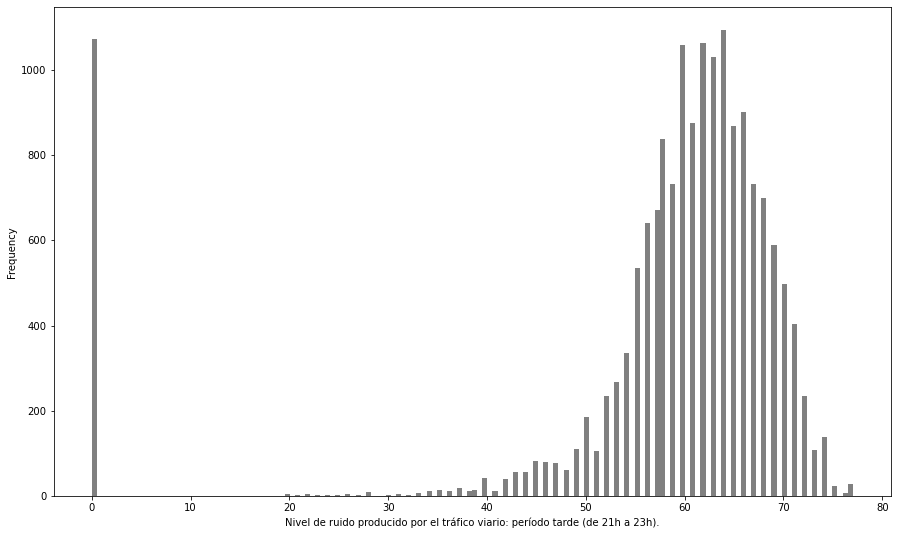

In [42]:
fig5, ax = plt.subplots(figsize=(15,9))
fig5=Noise2['TVLVES'].plot(kind='hist', bins=150, color=['gray'])
plt.xlabel('Nivel de ruido producido por el tráfico viario: período tarde (de 21h a 23h).')

ValueError: index must be a MultiIndex to unstack, <class 'pandas.core.indexes.numeric.Int64Index'> was passed

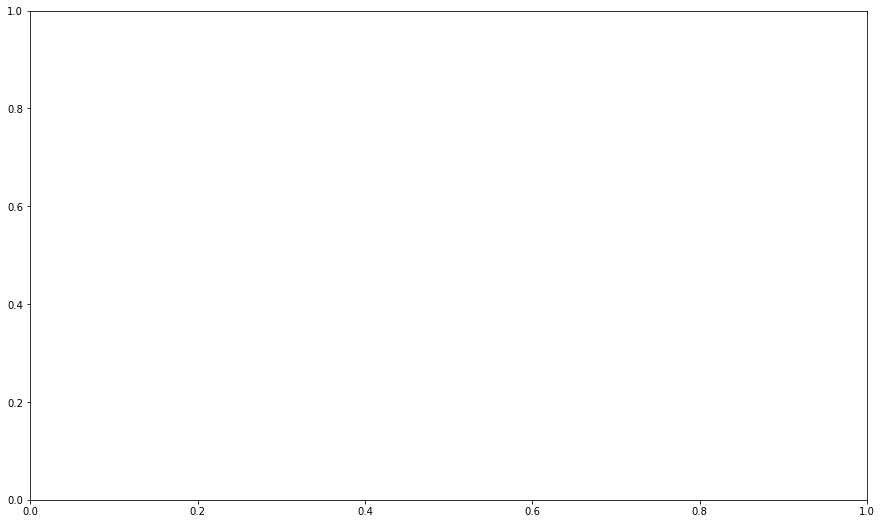

In [44]:
fig6, ax = plt.subplots(figsize=(15,9))
fig6=Noise2.groupby(['TVLDIA']).mean()['POBEXT'].unstack().plot(ax=ax)
plt.title("Personas afectadas en facha exterior por ruido de trafico viario")
plt.ylabel("Ruido trafico viario (dB)")
plt.xlabel("Personas en exterior")